Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import data_prep as dp

Import Data

In [7]:
dat_val, dat_tr = dp.load_train_split()

Path to dataset files: /Users/anabellafalk/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [8]:
dat_tr.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
13,2019-01-01 00:07:27,5559857416065248,fraud_Kiehn Inc,grocery_pos,96.29,Jack,Hill,M,5916 Susan Bridge Apt. 939,Grenada,...,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,1325376447,41.657520,-122.230347,0
14,2019-01-01 00:09:03,3514865930894695,fraud_Beier-Hyatt,shopping_pos,7.77,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,1325376543,32.863258,-106.520205,0
20,2019-01-01 00:13:08,4469777115158234880,fraud_Bauch-Raynor,grocery_pos,57.34,Gregory,Graham,M,4005 Dana Glens,Methuen,...,42.7280,-71.1810,47249,Market researcher,1980-11-22,139a1bee15be607d79fe173bfcb2502a,1325376788,42.268760,-71.217297,0


Potentially Significant predictors: category, amt, month/year

Controls/Identifiers: age, state, city pop, job?

Others to consider: distance

### Bin Jobs into Smaller Categories

In [15]:
dat_tr['job'].value_counts()

Water engineer                           6164
Petroleum engineer                       5161
Chartered loss adjuster                  5135
Radio broadcast assistant                4583
Surgeon                                  4138
                                         ... 
Chief of Staff                             11
Architect                                  11
Industrial buyer                           10
Development worker, international aid      10
Aeronautical engineer                       7
Name: job, Length: 192, dtype: int64

In [17]:
fraud_job = dat_tr.groupby('job')['is_fraud'].mean()
fraud_job

job
Administrator, charities/voluntary organisations    0.001981
Administrator, local government                     0.000000
Advertising account executive                       0.000000
Advice worker                                       0.000000
Aeronautical engineer                               1.000000
                                                      ...   
Toxicologist                                        0.000000
Trade mark attorney                                 0.005258
Video editor                                        0.000000
Water engineer                                      0.000000
Wellsite geologist                                  0.010711
Name: is_fraud, Length: 192, dtype: float64

(array([134.,  37.,  13.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          7.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

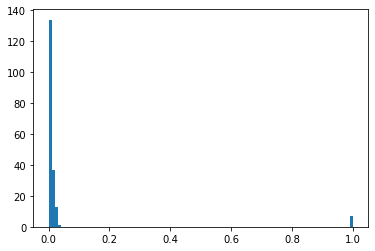

In [26]:
plt.hist(fraud_job.values, bins = 100)

#### Use Kmeans

In [44]:
from sklearn.cluster import KMeans
cluster = KMeans(3)

In [47]:
clusterings = cluster.fit_predict(fraud_job.values.reshape(-1,1))
clusterings

array([2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [48]:
cluster.cluster_centers_

array([[0.02015378],
       [1.        ],
       [0.00540699]])

In [30]:
fraud_job.shape

(192,)

In [49]:
clusterings.shape

(192,)

In [69]:
job_bin = pd.Series(clusterings)
job_bin.index=fraud_job.index
job_bin

job
Administrator, charities/voluntary organisations    2
Administrator, local government                     2
Advertising account executive                       2
Advice worker                                       2
Aeronautical engineer                               1
                                                   ..
Toxicologist                                        2
Trade mark attorney                                 2
Video editor                                        2
Water engineer                                      2
Wellsite geologist                                  2
Length: 192, dtype: int32

In [71]:
dat_tr['job_bin'] = dat_tr['job'].apply(lambda x: job_bin.loc[x])

In [74]:
dat_tr[['job','job_bin']]

,job,job_bin
1,Special educational needs teacher,2
4,Dance movement psychotherapist,2
13,Systems analyst,2
14,Naval architect,2
20,Market researcher,2
...,...,...
1296647,Further education lecturer,2
1296652,Facilities manager,2
1296661,"Administrator, local government",2
1296667,Exercise physiologist,2


In [75]:
job_bin.loc['Naval architect']

2

With more data consider binning by median job salary or salary ratio to transaction amount

### Bin Age to reduce levels